In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('brain_stroke.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
data['gender'].value_counts()

,count
gender,
Female,2907
Male,2074


In [ ]:
data['stroke'].value_counts()

,count
stroke,
0,4733
1,248


In [ ]:
women = data.loc[data.gender == 'Female']["stroke"]
rate_women = sum(women)/len(women)

print("% of women who had stroke:", rate_women)

% of women who had stroke: 0.048159614723082216


In [ ]:
men = data.loc[data.gender == 'Male']["stroke"]
rate_men = sum(men)/len(men)

print("% of men who had stroke:", rate_men)

% of men who had stroke: 0.052073288331726135


<Axes: xlabel='stroke', ylabel='count'>

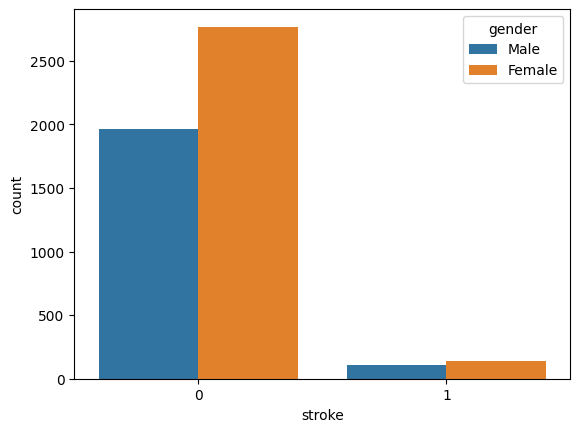

In [ ]:
sns.countplot(x="stroke", hue="gender", data=data)

<Axes: xlabel='stroke', ylabel='count'>

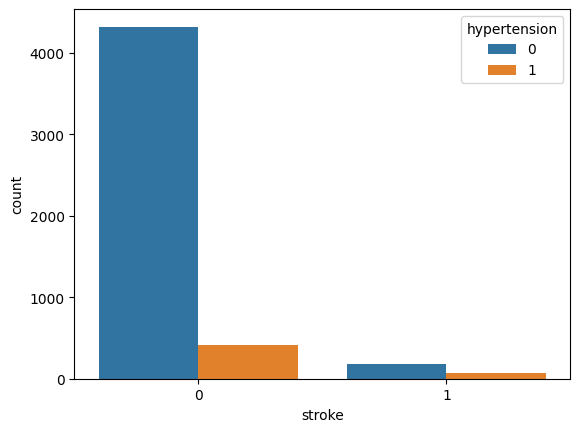

In [ ]:
sns.countplot(x="stroke", hue="hypertension", data=data)

In [ ]:
result = pd.crosstab(data['stroke'], data['heart_disease'])
print(result)

heart_disease     0    1
stroke                  
0              4505  228
1               201   47


array([[<Axes: title={'center': 'bmi'}>]], dtype=object)

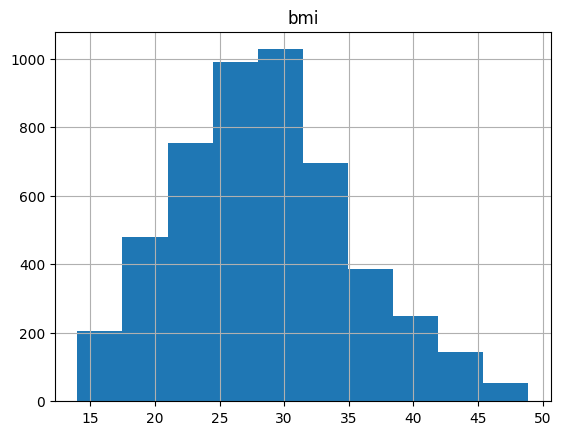

In [ ]:
data.hist("bmi")

In [ ]:
sex = pd.get_dummies(data["gender"], drop_first=True)

In [ ]:
sex.head()

,Male
0,True
1,True
2,False
3,False
4,True


In [ ]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]

In [ ]:
data['ever_married'].head()

,ever_married
0,1
1,1
2,1
3,1
4,1


In [ ]:
data['ever_married'].tail()

,ever_married
4976,0
4977,1
4978,1
4979,1
4980,1


In [ ]:
data['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1838
Unknown,1500
formerly smoked,867
smokes,776


In [ ]:
result = pd.crosstab(data['stroke'], data['Residence_type'])
print(result)

Residence_type  Rural  Urban
stroke                      
0                2336   2397
1                 113    135


In [ ]:
result = pd.crosstab(data['stroke'], data['work_type'])
print(result)

work_type  Govt_job  Private  Self-employed  children
stroke                                               
0               611     2712            739       671
1                33      148             65         2


In [ ]:
0.0540, 0.0545, 0.0879, 0.0029

In [ ]:
data=pd.get_dummies(data,columns=['work_type'])

In [ ]:
data = pd.concat([data, sex], axis=1)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Male
0,Male,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,False,True,False,False,True
1,Male,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,False,True,False,False,True
2,Female,49.0,0,0,1,Urban,171.23,34.4,smokes,1,False,True,False,False,False
3,Female,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,False,False,True,False,False
4,Male,81.0,0,0,1,Urban,186.21,29.0,formerly smoked,1,False,True,False,False,True


In [ ]:
data = data.replace({True: 1, False: 0})

<ipython-input-28-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
data.drop(["gender", "Residence_type", "smoking_status"], axis=1, inplace=True)

In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Male
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1
1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1
2,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0
3,79.0,1,0,1,174.12,24.0,1,0,0,1,0,0
4,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1


In [ ]:
data.shape

(4981, 12)

In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reet index after shuffling

In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Male
0,36.0,0,0,1,161.00,29.0,0,0,1,0,0,1
1,52.0,0,0,1,68.35,34.1,0,0,1,0,0,1
2,61.0,0,1,1,88.27,30.0,0,0,1,0,0,1
3,74.0,0,0,1,98.55,25.6,1,0,1,0,0,1
4,24.0,0,0,1,75.23,29.0,0,0,1,0,0,0


In [ ]:
X = data.drop('stroke', axis=1) # use all columns except 'target' as features
Y = data['stroke']

In [ ]:
X.shape, Y.shape

((4981, 11), (4981,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],         # Focus on fewer trees due to dataset size
    'max_depth': [5, 7, 10, 15, 50],         # Explore shallow and fully grown trees
    'max_features': ['sqrt', 'log2'],     # Use subsets of features for splits
    'min_samples_split': [2, 5, 10],       # Control node splits
    'class_weight': ['balanced']        # Adjust weights to handle the slight imbalance.
}

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [ ]:
# Perform Grid Search
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 7, 10, 15, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Extract results
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
# Select relevant columns for meta-dataset
meta_dataset = results[['param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split',
                        'mean_test_score']]

In [ ]:
# Rename columns for clarity
meta_dataset.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'param_min_samples_split': 'min_samples_split',
    'mean_test_score': 'accuracy'
}, inplace=True)


<ipython-input-50-584a53431e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset.rename(columns={


In [ ]:
# Add meta-features of the dataset
meta_features = {
    'num_features': X.shape[1],
    'num_samples': X.shape[0],
    'class_imbalance_ratio': Y.value_counts().max() / Y.value_counts().min(),
    'num_classes': len(Y.unique())
}

In [ ]:
for feature, value in meta_features.items():
    meta_dataset[feature] = value

<ipython-input-52-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-52-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-52-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
# Display the meta-dataset
print(meta_dataset.head())

   n_estimators  max_depth max_features  min_samples_split  accuracy  \
0            50          5         sqrt                  2  0.760643   
1            75          5         sqrt                  2  0.767068   
2           100          5         sqrt                  2  0.767336   
3           150          5         sqrt                  2  0.765462   
4           200          5         sqrt                  2  0.761981   

   num_features  num_samples  class_imbalance_ratio  num_classes  
0            11         4981              19.084677            2  
1            11         4981              19.084677            2  
2            11         4981              19.084677            2  
3            11         4981              19.084677            2  
4            11         4981              19.084677            2  


In [ ]:
# Save the meta-dataset to a CSV file for later use
meta_dataset.to_csv('meta_dataset_brainstroke.csv', index=False)